## CS591 Homework 2
#### By Anton Njavro

### EDA (Exploratory data analysis)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [74]:
#Load data
websiteA = pd.read_csv('WebsiteA.csv')
websiteB = pd.read_csv('WebsiteB.csv')

#Rename columns
websiteA.columns = ['TimeStamp','DwellTime','Converted','PurchaseAmount']
websiteB.columns = ['TimeStamp','DwellTime','Converted','PurchaseAmount']

In [75]:
#Display data
websiteA.head()


,TimeStamp,DwellTime,Converted,PurchaseAmount
0,179,58,0,0
1,307,55,0,0
2,540,97,0,0
3,788,16,0,0
4,804,553,0,0


In [99]:
#Get numbers on number of converts and amounts
number_of_A_converts = np.sum(websiteA['Converted'])
number_of_B_converts = np.sum(websiteB['Converted'])

#Convert ratio
convert_ratio_A = round(number_of_A_converts/len(websiteA),4)
convert_ratio_B = round(number_of_B_converts/len(websiteB),4)

#Revenue per customer 
rpcA =  round(np.sum(websiteA['PurchaseAmount'])/number_of_A_converts,2)
rpcB =  round(np.sum(websiteB['PurchaseAmount'])/number_of_B_converts,2)

print("Size of A: ", len(websiteA))
print("Size of B: ", len(websiteB))
print()
print("A converts: ", number_of_A_converts)
print("B converts: ", number_of_B_converts)
print()
print("A convert ratio: ", convert_ratio_A)
print("B convert ratio: ", convert_ratio_B)
print()
print("Revenue per customer (RPC) on website A:  $", rpcA)
print("Revenue per customer (RPC) on website B:  $", rpcB)

Size of A:  9999
Size of B:  7999

A converts:  905
B converts:  800

A convert ratio:  0.0905
B convert ratio:  0.1

Revenue per customer (RPC) on website A:  $ 414.14
Revenue per customer (RPC) on website B:  $ 381.67


In [92]:
#Make list only for customers that spent money
purchasedA = websiteA['PurchaseAmount']>0
revenueListA = websiteA[purchasedA]

purchasedB = websiteB['PurchaseAmount']>0
revenueListB = websiteB[purchasedB]

#ECDF
def ecdf(given_col):
    x=np.sort(given_col)
    y=np.arange(1,len(x)+1)/len(x)
    return x,y

#### ECDF

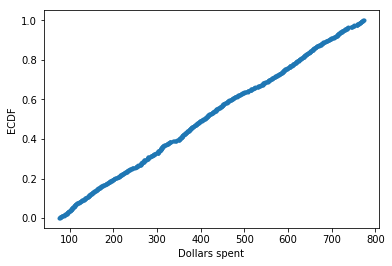

In [93]:
#Plot ECDF for website A
col_x, col_y = ecdf(revenueListA['PurchaseAmount'])
_=plt.plot(col_x,col_y,marker='.',linestyle='none')
_ = plt.xlabel('Dollars spent')
_ = plt.ylabel('ECDF')
plt.show()

In [108]:
def get_power(n, p1, p2, c1):
    alpha = 1-c1
    qu = stats.norm.ppf(1-alpha/2)
    diff = abs(p2-p1)
    bp = (p1+p2)/2
    v1 = p1*(1-p1)
    v2 = p2*(1-p2)
    bv = bp*(1-bp)
    power_part_one = stats.norm.cdf((n**0.5*diff-qu*(2*bv)**0.5)/(v1+v2)**0.5)
    power_part_two = 1 - stats.norm.cdf((n**0.5*diff+qu*(2*bv)**0.5)/(v1+v2)**0.5)
    power = power_part_one + power_part_two
    return power


def get_sample_size(power,p1,p2,c1,max_n = 10000000):
    n=1
    while n<=max_n:
        tmp_pwr = get_power(n,p1,p2,c1)
        if tmp_pwr>=power:
            return n
        else:
            n+=1
            
sample_size_per_group = get_sample_size(0.8,convert_ratio_A,convert_ratio_A*1.1,0.95)
print(sample_size_per_group)

16481


In [119]:
def get_pval(A_conv,B_conv,A_size,B_size):
    lift = -abs(B_conv-A_conv)
    scale_one = A_conv * (1-A_conv)/(1/A_size)
    scale_two = B_conv * (1-B_conv)/(1/B_size)
    scale_val = (scale_one+scale_two)**0.5
    p_val = 2 * stats.norm.cdf(lift,loc=0,scale=scale_val)
    return p_val

#Pval for converison rate
print("P-Val: ",get_pval(convert_ratio_A,convert_ratio_B,len(websiteA),len(websiteB)))

P-Val:  0.999807029364192


In [120]:
print("Power: ",get_power(len(websiteB),convert_ratio_A,convert_ratio_B,0.95))

Power:  0.5345486424126201


In [121]:
#Let's Perform T-test on revenue per customer
t, p = stats.ttest_ind(revenueListA['PurchaseAmount'],revenueListB['PurchaseAmount'])
print("t = ", str(t))
print("p = ", str(p))


t =  3.439619437569628
p =  0.0005965806878385328


With such a low p-value we can reject Ho and assert that there is significant difference when it comes to two populations in regards to RPC.

We can conclude that there is a significant drop in revenue per user on site B, hence we should re-inspect it and not proceed with it for the time being.